# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.metrics import f1_score , accuracy_score


<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_csv('/content/drive/MyDrive/DT on donors choose/preprocessed_data.csv')

In [7]:
y=data['project_is_approved']
X=data.drop(['project_is_approved'], axis=1)

In [8]:
data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [9]:
X.shape

(109248, 8)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [10]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [12]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [13]:
vectorizer=CountVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(X_train['essay'].values)



CountVectorizer(max_features=10000, min_df=10, ngram_range=(1, 4))

In [14]:
X_train_bow_essay= vectorizer.transform(tqdm(X_train['essay'].values))
#X_cv_bow_essay=vectorizer.transform(tqdm(X_cv['essay'].values))
X_test_bow_essay=vectorizer.transform(tqdm(X_test['essay'].values))

100%|██████████| 36052/36052 [00:19<00:00, 1890.66it/s]


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [15]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

-  1.4.1 Encoding School_state

In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data



CountVectorizer()

In [17]:
X_train_state_ohe = vectorizer.transform(tqdm(X_train['school_state'].values))
#X_cv_state_ohe = vectorizer.transform(tqdm(X_cv['school_state'].values))
X_test_state_ohe = vectorizer.transform(tqdm(X_test['school_state'].values))

100%|██████████| 36052/36052 [00:00<00:00, 285040.88it/s]


------------

-  1.4.2 Encoding teacher_prefix

In [18]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector




CountVectorizer()

In [19]:
X_train_teacher_ohe = vectorizer.transform(tqdm(X_train['teacher_prefix'].values))
#X_cv_teacher_ohe = vectorizer.transform(tqdm(X_cv['teacher_prefix'].values))
X_test_teacher_ohe = vectorizer.transform(tqdm(X_test['teacher_prefix'].values))

100%|██████████| 36052/36052 [00:00<00:00, 296254.52it/s]


-----------------------------------------------------------------------

-  1.4.3 Encoding Project_grade_category


In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

CountVectorizer()

In [21]:
X_train_grade_ohe = vectorizer.transform(tqdm(X_train['project_grade_category'].values))
#X_cv_grade_ohe = vectorizer.transform(tqdm(X_cv['project_grade_category'].values))
X_test_grade_ohe = vectorizer.transform(tqdm(X_test['project_grade_category'].values))


100%|██████████| 36052/36052 [00:00<00:00, 265783.11it/s]


- 1.4.4 Encoding clean_categories

In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

CountVectorizer()

In [23]:
X_train_clean_categories_ohe = vectorizer.transform(tqdm(X_train['clean_categories'].values))
#X_cv_clean_categories_ohe = vectorizer.transform(tqdm(X_cv['clean_categories'].values))
X_test_clean_categories_ohe = vectorizer.transform(tqdm(X_test['clean_categories'].values))


100%|██████████| 36052/36052 [00:00<00:00, 256991.53it/s]


- -----------------

- 1.4.5 Encoding clean_subcategories

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

CountVectorizer()

In [25]:
X_train_clean_subcategories_ohe = vectorizer.transform(tqdm(X_train['clean_subcategories'].values))
#X_cv_clean_subcategories_ohe = vectorizer.transform(tqdm(X_cv['clean_subcategories'].values))
X_test_clean_subcategories_ohe = vectorizer.transform(tqdm(X_test['clean_subcategories'].values))


100%|██████████| 36052/36052 [00:00<00:00, 242743.68it/s]


--------------------------------------------------

- 1.4.6 Encoding teacher_number_of_previously_posted_projects	

In [26]:
normalizer= Normalizer(norm='l1')
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

Normalizer(norm='l1')

In [27]:
X_train_previous_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_previous_posted_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

-------------------------------------------------------------------

- 1.4.7 Encoding Price

In [28]:
normalizer= Normalizer(norm='l1')
normalizer.fit(X_train['price'].values.reshape(-1,1))

Normalizer(norm='l1')

In [29]:
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


-------------------

- CONCATINATING

In [30]:
X_tr=hstack((X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe, X_train_previous_posted_norm, 
             X_train_clean_categories_ohe,X_train_clean_subcategories_ohe, X_train_bow_essay,X_train_price_norm
            )).tocsr()


#X_crossv=hstack((X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_previous_posted_norm,
            # X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_bow_essay,X_cv_price_norm
           # )).tocsr()


X_te=hstack((X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_previous_posted_norm,
              X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_bow_essay,X_test_price_norm
              )).tocsr()

In [31]:


print(X_tr.shape, y_train.shape)
#print(X_crossv.shape, y_cv.shape)
print(X_te.shape,y_test.shape)

(73196, 10101) (73196,)
(36052, 10101) (36052,)


-------------------------------------------------

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [32]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [33]:
classifier= MultinomialNB(fit_prior=False, class_prior=[0.5,0.5])
parameters={'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100],
             'class_prior':[[0.1,0.9],[0.2,0.8],[0.3,0.7],[0.4,0.6],[0.5,0.5],[0.6,0.4]]  
           }

clf= RandomizedSearchCV(classifier,parameters,cv=10,scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr,y_train)

RandomizedSearchCV(cv=10,
                   estimator=MultinomialNB(class_prior=[0.5, 0.5],
                                           fit_prior=False),
                   n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0005, 0.0001, 0.005,
                                                  0.001, 0.05, 0.01, 0.1, 0.5,
                                                  1, 5, 10, 50, 100],
                                        'class_prior': [[0.1, 0.9], [0.2, 0.8],
                                                        [0.3, 0.7], [0.4, 0.6],
                                                        [0.5, 0.5],
                                                        [0.6, 0.4]]},
                   return_train_score=True, scoring='roc_auc')

In [34]:
clf.best_params_

{'alpha': 1e-05, 'class_prior': [0.2, 0.8]}

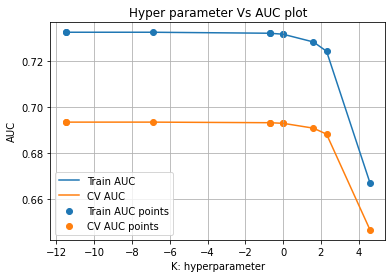

In [35]:

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']



log=[]
for i in K:
    loga=math.log(i)
    log.append(loga)
    

plt.plot(log, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log, train_auc, label='Train AUC points')
plt.scatter(log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


--------------------------

# Training the Model with best Hyperparameter

In [68]:
Classifier=MultinomialNB(alpha=1e-05,class_prior=[0.2,0.8], fit_prior=False)
Classifier.fit(X_tr, y_train)


MultinomialNB(alpha=1e-05, class_prior=[0.2, 0.8], fit_prior=False)

In [69]:
y_train_pred=Classifier.predict_proba(X_tr)[:,1]
y_test_pred=Classifier.predict_proba(X_te)[:,1]

In [70]:

train_fpr, train_tpr, tr_threshold= roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_threshold = roc_curve(y_test, y_test_pred)

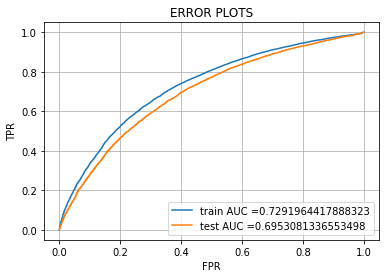

In [71]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [72]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [73]:
best_t = find_best_threshold(tr_threshold, train_fpr, train_tpr)


the maximum value of tpr*(1-fpr) 0.4551574372606127 for threshold 0.82


In [74]:
cm_train=confusion_matrix(y_train,predict_with_best_t(y_train_pred, best_t))

In [75]:
cm_train

array([[ 7642,  3441],
       [21112, 41001]])

In [76]:
cm_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred,best_t))

In [77]:
cm_test

array([[ 3503,  1956],
       [10571, 20022]])

In [78]:
def confusion_matrix_train_data(cm):
    ax= plt.subplot();
    sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix Train Data');
    ax.xaxis.set_ticklabels(['No','Yes']); 
    ax.yaxis.set_ticklabels(['No','Yes']);

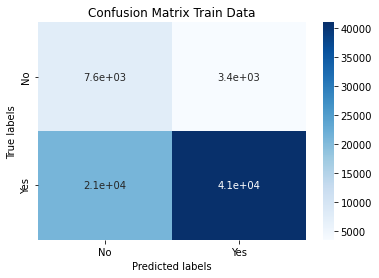

In [79]:
confusion_matrix_train_data(cm_train)

In [80]:
cm_train

array([[ 7642,  3441],
       [21112, 41001]])

In [81]:
def confusion_matrix_test_data(cm):
    ax= plt.subplot();
    sns.heatmap(cm,annot=True,cmap='Blues',ax=ax);
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_ylim(2.0, 0)
    ax.set_title('Confusion Matrix Test Data');
    ax.xaxis.set_ticklabels(['No','Yes']); 
    ax.yaxis.set_ticklabels(['No','Yes']);

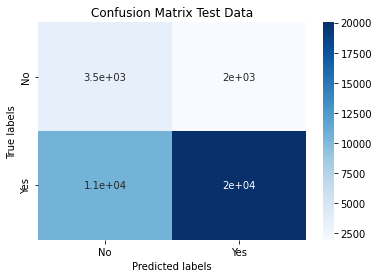

In [82]:
confusion_matrix_test_data(cm_test)


In [84]:
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter",'class_prior', " Test AUC"]

x.add_row(["BOW", "Multonomial Naive Bayes", 0.0005,[0.3,0.7], 0.69])
x.add_row(["TFIDF", "Multinomial Naive Bayes", 0.001,[0.3,0.7], 0.68ew])

print(x)

+------------+-------------------------+-----------------------+-------------+-----------+
| Vectorizer |          Model          | Alpha:Hyper Parameter | class_prior |  Test AUC |
+------------+-------------------------+-----------------------+-------------+-----------+
|    BOW     | Multonomial Naive Bayes |         0.0005        |  [0.3, 0.7] |    0.69   |
|   TFIDF    | Multinomial Naive Bayes |         0.001         |  [0.3, 0.7] |    0.68   |
+------------+-------------------------+-----------------------+-------------+-----------+
